In [2]:
# from IPython.display import Image 

from pandas import Series, DataFrame
import pandas as pd
import numpy as np

# DataFrame 객체 생성1
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'year' : [2000, 2001, 2002, 2001, 2002],
        'pop'  : [1.5, 1.7, 3.6, 2.4, 2.9]}
frame = DataFrame(data); frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [4]:
# column 순서 지정하기
DataFrame(data, columns = ['year', 'state', 'pop'])

,uear,state,pop
0,NaN,Ohio,1.5
1,NaN,Ohio,1.7
2,NaN,Ohio,3.6
3,NaN,Nevada,2.4
4,NaN,Nevada,2.9


In [9]:
frame2 = DataFrame(data, columns=['year', 'state', 'pop', 'debt'], # 컬럼에 debt 추가
                   index=['one', 'two', 'three', 'four', 'five']) # 기본 인덱스 변경
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN


In [10]:
frame2.columns #현재 컬럼명을 확인할 수 있음.

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [11]:
frame2['state'] # == frame2.year

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
Name: state, dtype: object

In [12]:
frame2.loc[:, 'year'] # 로우로 보기 == frame2.iloc[0] == frame2.iloc[:, 0]

one      2000
two      2001
three    2002
four     2001
five     2002
Name: year, dtype: int64

In [13]:
frame2['debt'] = 16.5 # 빈 값에 값 채워주기
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5


In [14]:
frame2['debt'] = np.arange(5.) # 0부터 5.0까지 실수 타입으로 한 개씩 값을 넣어줌
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0


In [15]:
val = Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five']) # 시리즈 하나 생성
frame2['debt'] = val # debt에 넣어줌
frame2 # 현 df에는 one~five까지 있는데 val index는 3개니까 2개는 NaN값으로 들어감

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7


In [16]:
# df에 eastern을 만들 건데 frame2.state에서 값이 Ohio인 것만 넣을 거임
frame2['eastern'] = (frame2.state == 'Ohio')
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False


In [30]:
del frame2['eastern'] # column 삭제(이 방법으로 row는 삭제 불가능)

KeyError: 'eastern'

In [31]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7


# 팁 = 색인으로 생성된 컬럼은 원본임, 복사를 하려면 copy를 써야 함

In [33]:
# DataFrame 객체 생성3  
# 중첩된 dict, 바깥 사전의 키값이 칼럼이 되고 안의 키는 로우가 된다.
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
       'Ohio'  : {2000: 1.5, 2001: 1.7, 2002: 3.6}}
frame3 = DataFrame(pop); frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [34]:
# NumPy에서 처럼 결과값의 순서 뒤집기
frame3.T

,2000,2001,2002
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.6


In [35]:
DataFrame(pop, index=[2001, 2002, 2003]) # 2개밖에 없던 인덱스를 3개로 늘려서 NaN
# 위 값은 리턴이 복사본임, 값 저장하려면 변수에 넣어놔야 함

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


In [55]:
DataFrame(pop, index=[2001, 2002, 2003]) # 2개밖에 없던 인덱스를 3개로 늘려서 NaN
# 위 값은 리턴이 복사본임, 값 저장하려면 변수에 넣어놔야 함

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


In [37]:
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [ ]:
# 인덱스 2까지 기준으로 Ohio, Nevada 가져오는 범위가 같음
pdata = {'Ohio'  : frame3['Ohio'][:-1],
         'Nevada': frame3['Nevada'][:2]}
DataFrame(pdata)

In [38]:
frame3.index.name = 'year'
frame3.columns.name = 'state'
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [39]:
frame3.values # 이런 식으로 값이 들어가 있음

array([[nan, 1.5],
       [2.4, 1.7],
       [2.9, 3.6]])

In [41]:
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False


In [40]:
frame2.values

array([[2000, 'Ohio', 1.5, nan, True],
       [2001, 'Ohio', 1.7, -1.2, True],
       [2002, 'Ohio', 3.6, nan, True],
       [2001, 'Nevada', 2.4, -1.5, False],
       [2002, 'Nevada', 2.9, -1.7, False]], dtype=object)

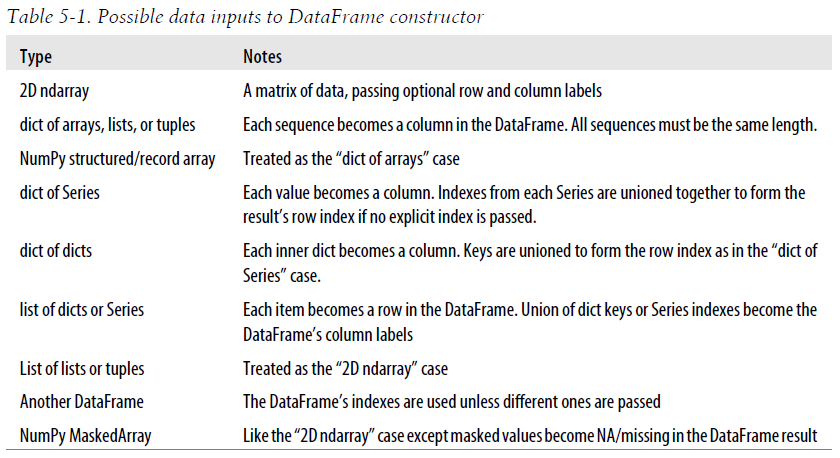

# Index objects

In [62]:
index = pd.Index(np.arange(3))
obj2 = Series([1.5, -2.5, 0], index=index) # == index = 0, 1, 2
obj2.index is index # 당근 트루

True

In [64]:
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [65]:
'Ohio' in frame3.columns # 컬럼 명 안에 포함되어 있음.

True

In [67]:
2003 in frame3.index # 인덱스 안에 포함되어 있지 않음

False

# pandas의 주요 Index 객체
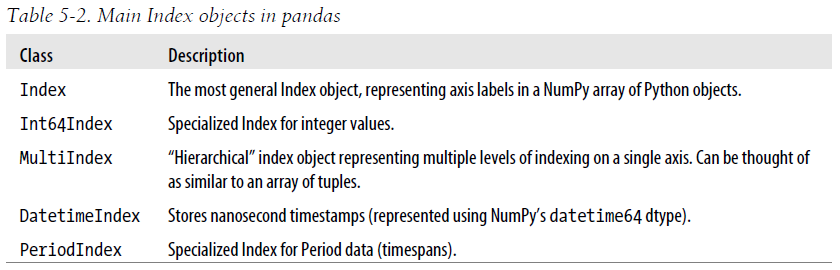

# Index 메소드와 속성
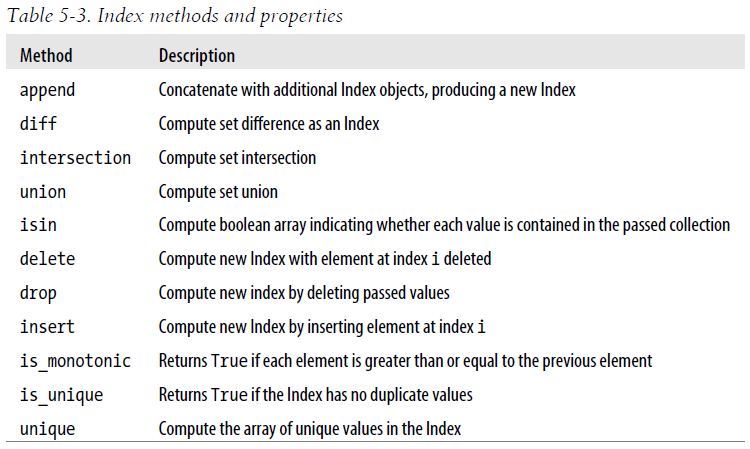